In [1]:
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft
from findiff import FinDiff
import matplotlib.patches as mpatches
from numpy.lib.type_check import common_type
from unidecode import unidecode
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df0=pd.read_csv("rspk0.csv")     # T = 0 years
df25=pd.read_csv("rspk250.csv")   # T = 0.5 years
df50=pd.read_csv("rspk500.csv")   # T = 1 year
df75=pd.read_csv("rspk750.csv")   # T = 1.5 years
df99=pd.read_csv("rspk999.csv")   # T = 2 years

In [3]:
r_theta0 = df0.iloc[:,1]
tau_theta0 = df0.iloc[:,2]
kappa_theta0 = df0.iloc[:,3]
theta_indices0 = np.sort(df0.iloc[:,0])
pdgf_theta0 = df0.iloc[:,4]

In [4]:
r_theta25 = df25.iloc[:,1]
tau_theta25 = df25.iloc[:,2]
kappa_theta25 = df25.iloc[:,3]
theta_indices25 = np.sort(df25.iloc[:,0])
pdgf_theta25 = df25.iloc[:,4]

In [5]:
r_theta50 = df50.iloc[:,1]
tau_theta50 = df50.iloc[:,2]
kappa_theta50 = df50.iloc[:,3]
theta_indices50 = np.sort(df50.iloc[:,0])
pdgf_theta50 = df50.iloc[:,4]

In [6]:
r_theta75 = df75.iloc[:,1]
tau_theta75 = df75.iloc[:,2]
kappa_theta75 = df75.iloc[:,3]
theta_indices75 = np.sort(df75.iloc[:,0])
pdgf_theta75 = df75.iloc[:,4]

In [7]:
r_theta99 = df99.iloc[:,1]
tau_theta99 = df99.iloc[:,2]
kappa_theta99 = df99.iloc[:,3]
theta_indices99 = np.sort(df99.iloc[:,0])
pdgf_theta99 = df99.iloc[:,4]

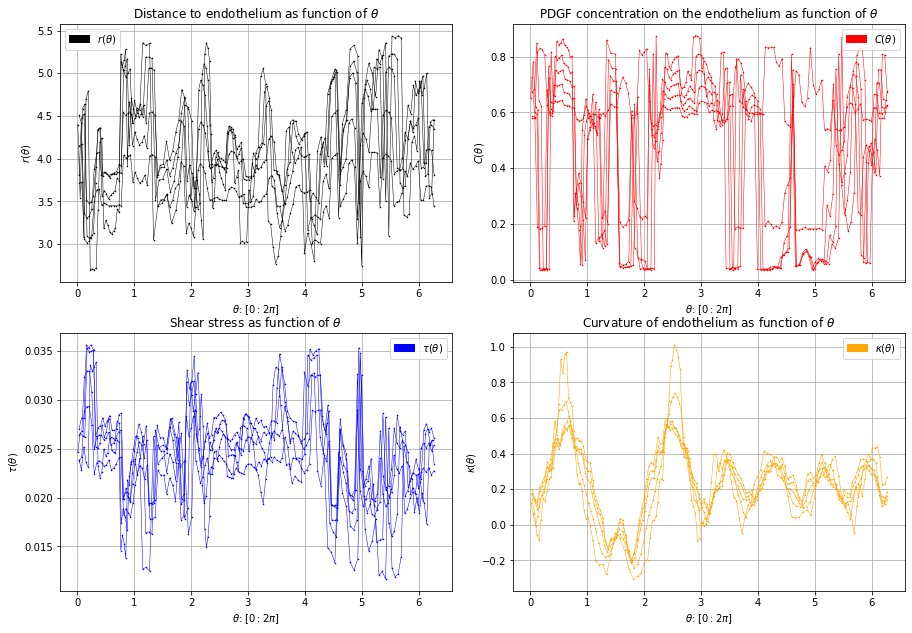

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta25, color='black', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta50, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta75, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta99, color='black', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='black', label='$r(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[0,0].legend(handles=[pop_b])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
#ax[0,0].set_ylim([0,20])
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta0, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta25, color='red', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta75, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta99, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='red', label='$C(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[0,1].legend(handles=[pop_b])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, tau_theta0, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, tau_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,0].plot(theta_indices50, tau_theta50, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, tau_theta75, color='blue', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, tau_theta99, color='blue', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='blue', label='$\\tau(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[1,0].legend(handles=[pop_b])
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_theta0, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_theta25, color='orange', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_theta50, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_theta75, color='orange', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()

Smoothing the radius

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
y0 = r_theta0
x25 = theta_indices25
y25 = r_theta25
x50 = theta_indices50
y50 = r_theta50
x75 = theta_indices75
y75 = r_theta75
x99 = theta_indices99
y99 = r_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
sp0 = csaps(x0, y0, smooth=0.99)
sp25 = csaps(x25, y25, smooth=0.99)
sp50 = csaps(x50, y50, smooth=0.99)
sp75 = csaps(x75, y75, smooth=0.99)
sp99 = csaps(x99, y99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ys0 = sp0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ys25 = sp25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ys50 = sp50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ys75 = sp75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ys99 = sp99(xs99)


#plt.plot(x0, y0, 'o', xs0, ys0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

Smoothing $\\Tau(\\theta)$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
s0 = tau_theta0
x25 = theta_indices25
s25 = tau_theta25
x50 = theta_indices50
s50 = tau_theta50
x75 = theta_indices75
s75 = tau_theta75
x99 = theta_indices99
s99 = tau_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
sh0 = csaps(x0, s0, smooth=0.99)
sh25 = csaps(x25, s25, smooth=0.99)
sh50 = csaps(x50, s50, smooth=0.99)
sh75 = csaps(x75, s75, smooth=0.99)
sh99 = csaps(x99, s99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ss0 = sh0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ss25 = sh25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ss50 = sh50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ss75 = sh75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ss99 = sh99(xs99)

shear_theta0 = ss0
shear_theta25 = ss25
shear_theta50 = ss50
shear_theta75 = ss75
shear_theta99 = ss99


#plt.plot(xs0, ss0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

Smoothing pdgf

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from csaps import csaps
#from csaps import UnivariateCubicSmoothingSpline

#np.random.seed(1234)

x0 = theta_indices0
p0 = pdgf_theta0
x25 = theta_indices25
p25 = pdgf_theta25
x50 = theta_indices50
p50 = pdgf_theta50
x75 = theta_indices75
p75 = pdgf_theta75
x99 = theta_indices99
p99 = pdgf_theta99

#xi = np.linspace(x[0], x[-1], len(x))


#x = np.linspace(-5., 5., 25)
#y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

#sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.0001)
ph0 = csaps(x0, p0, smooth=0.99)
ph25 = csaps(x25, p25, smooth=0.99)
ph50 = csaps(x50, p50, smooth=0.99)
ph75 = csaps(x75, p75, smooth=0.99)
ph99 = csaps(x99, p99, smooth=0.99)


xs0 = np.linspace(x0[0], x0[-1], len(x0))
ps0 = ph0(xs0)
xs25 = np.linspace(x25[0], x25[-1], len(x25))
ps25 = ph25(xs25)
xs50 = np.linspace(x50[0], x50[-1], len(x50))
ps50 = ph50(xs50)
xs75 = np.linspace(x75[0], x75[-1], len(x75))
ps75 = ph75(xs75)
xs99 = np.linspace(x99[0], x99[-1], len(x99))
ps99 = ph99(xs99)

pdgf_theta_new0 = ps0
pdgf_theta_new25 = ps25
pdgf_theta_new50 = ps50
pdgf_theta_new75 = ps75
pdgf_theta_new99 = ps99


#plt.plot(xs0, ss0, '-')
#plt.ylim([6.8,6.825])
#plt.show()

In [12]:
r_theta_new0 = ys0
r_theta_new_p0 = np.gradient(ys0,theta_indices0)
r_theta_new_2p0 = np.gradient(r_theta_new_p0,theta_indices0)

num0 = (r_theta_new0**2)+2*(r_theta_new_p0**2)-(r_theta_new0*(r_theta_new_2p0))
den0 = (r_theta_new0**2 + r_theta_new_p0**2)**(1.5)
    
kappa_new_0 = num0/den0

#****************************

r_theta_new25 = ys25
r_theta_new_p25 = np.gradient(ys25,theta_indices25)
r_theta_new_2p25 = np.gradient(r_theta_new_p25,theta_indices25)

num25 = (r_theta_new25**2)+2*(r_theta_new_p25**2)-(r_theta_new25*(r_theta_new_2p25))
den25 = (r_theta_new25**2 + r_theta_new_p25**2)**(1.5)
    
kappa_new_25 = num25/den25

#****************************

r_theta_new50 = ys50
r_theta_new_p50 = np.gradient(ys50,theta_indices50)
r_theta_new_2p50 = np.gradient(r_theta_new_p50,theta_indices50)

num50 = (r_theta_new50**2)+2*(r_theta_new_p50**2)-(r_theta_new50*(r_theta_new_2p50))
den50 = (r_theta_new50**2 + r_theta_new_p50**2)**(1.5)
    
kappa_new_50 = num50/den50

#****************************

r_theta_new75 = ys75
r_theta_new_p75 = np.gradient(ys75,theta_indices75)
r_theta_new_2p75 = np.gradient(r_theta_new_p75,theta_indices75)

num75 = (r_theta_new75**2)+2*(r_theta_new_p75**2)-(r_theta_new75*(r_theta_new_2p75))
den75 = (r_theta_new75**2 + r_theta_new_p75**2)**(1.5)
    
kappa_new_75 = num75/den75

#****************************

r_theta_new99 = ys99
r_theta_new_p99 = np.gradient(ys99,theta_indices99)
r_theta_new_2p99 = np.gradient(r_theta_new_p99,theta_indices99)

num99 = (r_theta_new99**2)+2*(r_theta_new_p99**2)-(r_theta_new99*(r_theta_new_2p99))
den99 = (r_theta_new99**2 + r_theta_new_p99**2)**(1.5)
    
kappa_new_99 = num99/den99

#****************************

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(13,9))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

ax[0,0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='orange', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,0].set_ylabel('$r(\\theta)$')
ax[0,0].set_title('Distance to endothelium as function of $\\theta$')
ax[0,0].grid()

ax[0,1].plot(theta_indices0, pdgf_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices25, pdgf_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices75, pdgf_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[0,1].plot(theta_indices99, pdgf_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='orange', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=1.5$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[0,1].set_ylabel('$C(\\theta)$')
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$')
ax[0,1].grid()

ax[1,0].plot(theta_indices0, tau_theta0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices25, tau_theta25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,0].plot(theta_indices50, tau_theta50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices75, tau_theta75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,0].plot(theta_indices99, tau_theta99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.25$ years')
pop_c = mpatches.Patch(color='red', label = '$T=0.5$ year')
pop_d = mpatches.Patch(color='green', label = '$T=0.75$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=1$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,0].set_ylabel('$\\tau(\\theta)$')
ax[1,0].set_title('Shear stress as function of $\\theta$')
ax[1,0].grid()

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=0.5)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=0.5)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=0.5)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$')
ax[1,1].set_ylabel('$\\kappa(\\theta)$')
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$')
ax[1,1].grid()

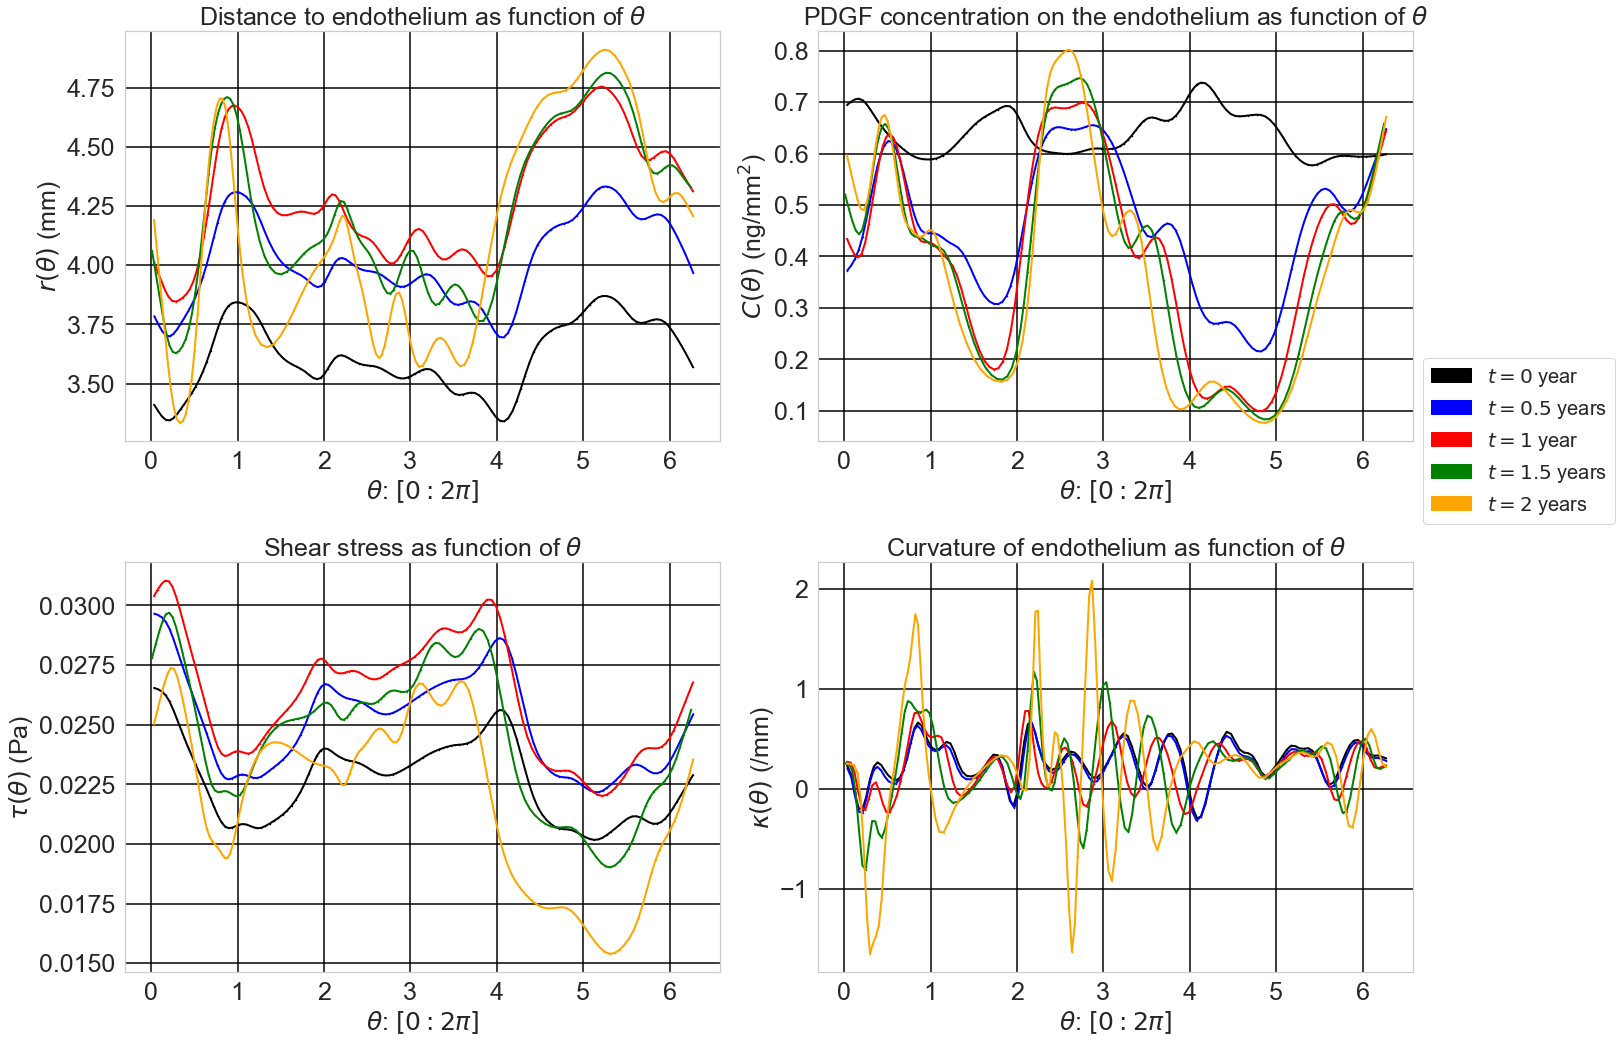

In [46]:
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=5.0)

ax[0,0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0,0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0,0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].plot(theta_indices1500, r_theta1500, color='red', marker = '*', markersize=1, lw=0.5)
#ax[0,0].set_ylim([2,5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,0].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0,0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0,0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0,0].grid(color='black',linewidth = 1.5)

ax[0,1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0,1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0,1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].set_ylim([3.4,3.5])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
#ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d])
ax[0,1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0,1].set_ylabel('$C(\\theta)$ (ng/mm$^{2}$)',fontsize=25)
ax[0,1].set_title('PDGF concentration on the endothelium as function of $\\theta$',fontsize=25)
ax[0,1].grid(color='black',linewidth = 1.5)

ax[1,0].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1,0].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1,0].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
#ax[0,0].set_ylim([3.4,3.5])
pop_a = mpatches.Patch(color='black', label = '$t=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$t=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$t=1$ year')
pop_d = mpatches.Patch(color='green', label = '$t=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$t=2$ years')
ax[0,1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0))
ax[1,0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1,0].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1,0].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1,0].grid(color='black',linewidth = 1.5)

ax[1,1].plot(theta_indices0, kappa_new_0, color='black', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices25, kappa_new_25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[1,1].plot(theta_indices50, kappa_new_50, color='red', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices75, kappa_new_75, color='green', marker = '*', markersize=1, lw=2)
ax[1,1].plot(theta_indices99, kappa_new_99, color='orange', marker = '*', markersize=1, lw=2)
#ax[1,1].set_ylim([0.1,0.4])
#pop_a = mpatches.Patch(color='red', label='PDGF(theta)')
#pop_b = mpatches.Patch(color='orange', label='$\\kappa(\\theta)$')
#pop_c = mpatches.Patch(color='black', label = j)
#ax[1,1].legend(handles=[pop_b])
ax[1,1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1,1].set_ylabel('$\\kappa(\\theta)$ (/mm)',fontsize=25)
ax[1,1].set_title('Curvature of endothelium as function of $\\theta$',fontsize=25)
ax[1,1].grid(color='black',linewidth = 1.5)
for ax in (ax[0,0], ax[0,1], ax[1,0], ax[1,1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('hflcomparisonplotsregularized', bbox_inches='tight',dpi=90)

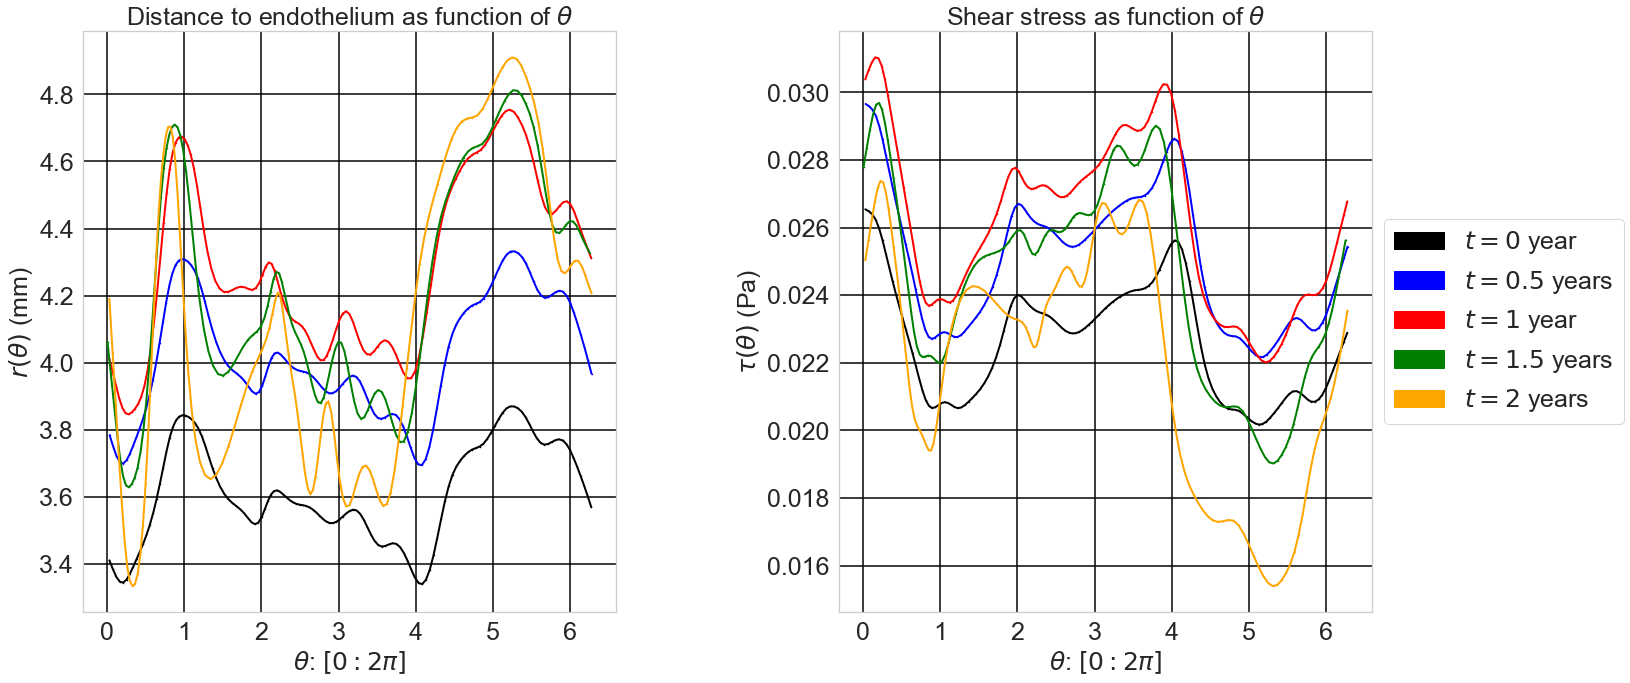

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, shear_theta0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices25, shear_theta25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices50, shear_theta50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, shear_theta75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, shear_theta99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$t=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$t=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$t=1$ year')
pop_d = mpatches.Patch(color='green', label = '$t=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$t=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$\\tau(\\theta)$ (Pa)',fontsize=25)
ax[1].set_title('Shear stress as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('hfl_rthetavstautheta', bbox_inches='tight',dpi=85)

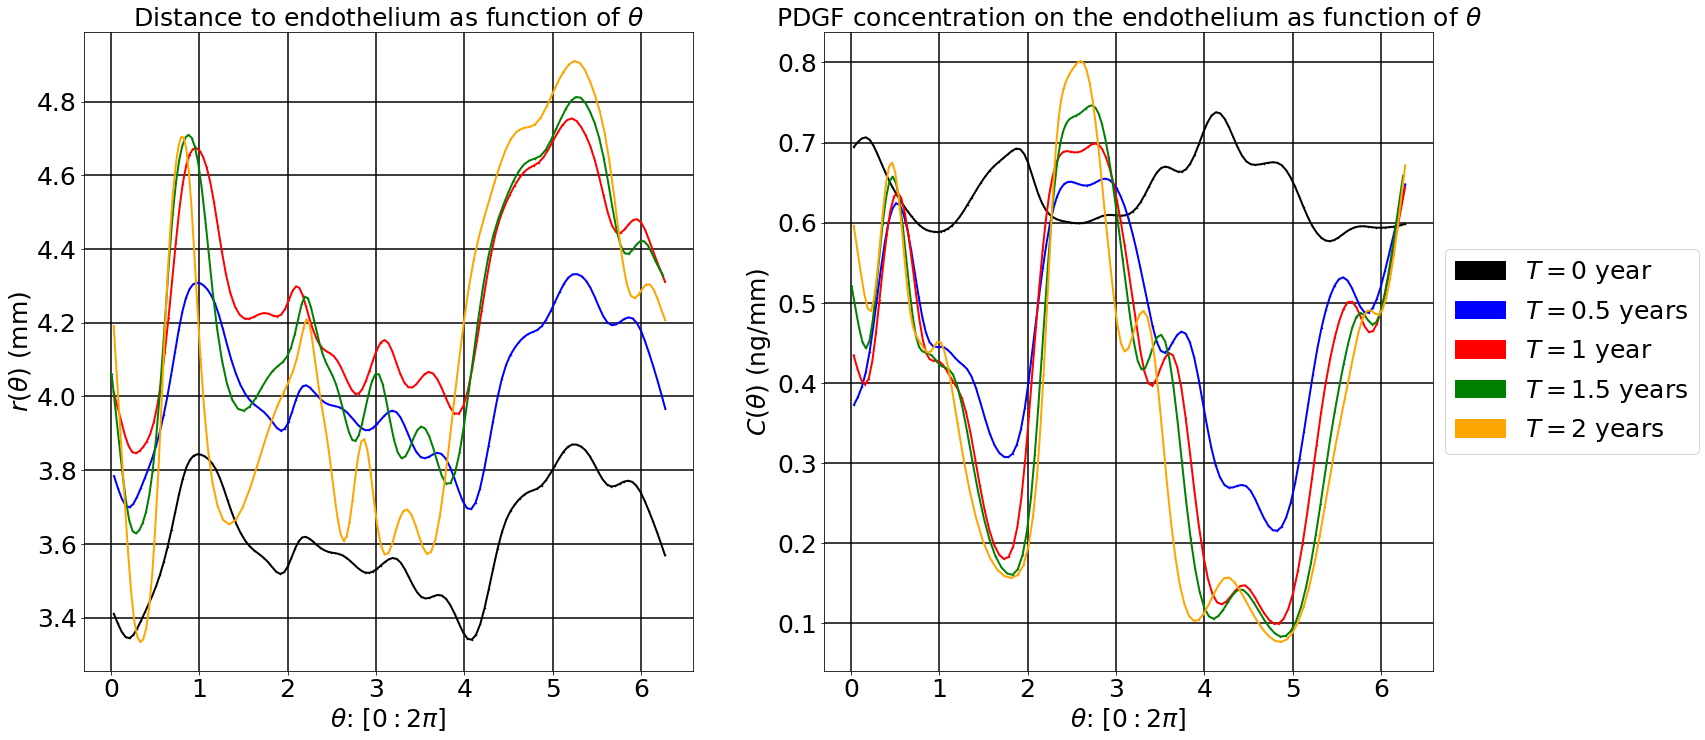

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.tight_layout(pad=3.0, w_pad=10.0, h_pad=3.0)
#plt.setp(ax.get_xticklabels(), fontsize=12)

ax[0].plot(theta_indices0, r_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices25, r_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  # Multipying factor was 0.02
ax[0].plot(theta_indices50, r_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices75, r_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[0].plot(theta_indices99, r_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[0].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[0].set_ylabel('$r(\\theta)$ (mm)',fontsize=25)
ax[0].set_title('Distance to endothelium as function of $\\theta$',fontsize=25)
ax[0].grid(color='black',linewidth = 1.5)


ax[1].plot(theta_indices0, pdgf_theta_new0, color='black', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices25, pdgf_theta_new25, color='blue', marker = '*', markersize=1, lw=2)  
ax[1].plot(theta_indices50, pdgf_theta_new50, color='red', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices75, pdgf_theta_new75, color='green', marker = '*', markersize=1, lw=2)
ax[1].plot(theta_indices99, pdgf_theta_new99, color='orange', marker = '*', markersize=1, lw=2)
pop_a = mpatches.Patch(color='black', label = '$T=0$ year')
pop_b = mpatches.Patch(color='blue', label = '$T=0.5$ years')
pop_c = mpatches.Patch(color='red', label = '$T=1$ year')
pop_d = mpatches.Patch(color='green', label = '$T=1.5$ years')
pop_e = mpatches.Patch(color='orange', label = '$T=2$ years')
ax[1].legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
ax[1].set_xlabel('$\\theta$: $[0 : 2\pi]$',fontsize=25)
ax[1].set_ylabel('$C(\\theta)$ (ng/mm)',fontsize=25)
ax[1].set_title('PDGF concentration on the endothelium as function of $\\theta$',fontsize=25)
ax[1].grid(color='black',linewidth = 1.5)

for ax in (ax[0], ax[1]):
    # Rest of the code
    ax.tick_params(which='both', labelsize=25)

plt.savefig('hflrthetavspdgftheta', bbox_inches='tight',dpi=85)

In [17]:
df0['reg_kappa_theta'] = kappa_new_0
df25['reg_kappa_theta'] = kappa_new_25
df50['reg_kappa_theta'] = kappa_new_50
df75['reg_kappa_theta'] = kappa_new_75
df99['reg_kappa_theta'] = kappa_new_99

In [18]:
sns.lmplot(data = df99, x="r_indices", y="tau_indices")
plt.ticklabel_format(useOffset=False)

In [19]:
df0.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000   0.170237    -0.191132    -0.053679   
r_indices             0.170237   1.000000    -0.900857    -0.059975   
tau_indices          -0.191132  -0.900857     1.000000     0.123795   
kappa_theta          -0.053679  -0.059975     0.123795     1.000000   
pdgf_theta           -0.072575  -0.807794     0.671899    -0.057399   
reg_kappa_theta       0.127567   0.508130    -0.458347     0.146917   

                 pdgf_theta  reg_kappa_theta  
theta_indices     -0.072575         0.127567  
r_indices         -0.807794         0.508130  
tau_indices        0.671899        -0.458347  
kappa_theta       -0.057399         0.146917  
pdgf_theta         1.000000        -0.433548  
reg_kappa_theta   -0.433548         1.000000

In [20]:
df25.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000   0.168302    -0.191475    -0.056212   
r_indices             0.168302   1.000000    -0.902352    -0.065169   
tau_indices          -0.191475  -0.902352     1.000000     0.124567   
kappa_theta          -0.056212  -0.065169     0.124567     1.000000   
pdgf_theta           -0.094583   0.027649     0.071562     0.241781   
reg_kappa_theta       0.131594   0.493357    -0.450414     0.136411   

                 pdgf_theta  reg_kappa_theta  
theta_indices     -0.094583         0.131594  
r_indices          0.027649         0.493357  
tau_indices        0.071562        -0.450414  
kappa_theta        0.241781         0.136411  
pdgf_theta         1.000000         0.048217  
reg_kappa_theta    0.048217         1.000000

In [21]:
df50.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000   0.226567    -0.228593    -0.040542   
r_indices             0.226567   1.000000    -0.879758    -0.118267   
tau_indices          -0.228593  -0.879758     1.000000     0.103224   
kappa_theta          -0.040542  -0.118267     0.103224     1.000000   
pdgf_theta           -0.135756  -0.187782     0.061236     0.266178   
reg_kappa_theta       0.083998   0.229801    -0.177233     0.071182   

                 pdgf_theta  reg_kappa_theta  
theta_indices     -0.135756         0.083998  
r_indices         -0.187782         0.229801  
tau_indices        0.061236        -0.177233  
kappa_theta        0.266178         0.071182  
pdgf_theta         1.000000        -0.141309  
reg_kappa_theta   -0.141309         1.000000

In [22]:
df75.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000   0.222627    -0.248466    -0.032185   
r_indices             0.222627   1.000000    -0.903809    -0.116908   
tau_indices          -0.248466  -0.903809     1.000000     0.103238   
kappa_theta          -0.032185  -0.116908     0.103238     1.000000   
pdgf_theta           -0.174498  -0.170376     0.130966     0.265449   
reg_kappa_theta       0.101807   0.148136    -0.156006     0.046582   

                 pdgf_theta  reg_kappa_theta  
theta_indices     -0.174498         0.101807  
r_indices         -0.170376         0.148136  
tau_indices        0.130966        -0.156006  
kappa_theta        0.265449         0.046582  
pdgf_theta         1.000000        -0.060591  
reg_kappa_theta   -0.060591         1.000000

In [23]:
df99.corr()

theta_indices  r_indices  tau_indices  kappa_theta  \
theta_indices         1.000000   0.224697    -0.271659    -0.023867   
r_indices             0.224697   1.000000    -0.906435    -0.131078   
tau_indices          -0.271659  -0.906435     1.000000     0.097761   
kappa_theta          -0.023867  -0.131078     0.097761     1.000000   
pdgf_theta           -0.203579  -0.263618     0.194365     0.282552   
reg_kappa_theta       0.093532   0.164967    -0.209614    -0.012046   

                 pdgf_theta  reg_kappa_theta  
theta_indices     -0.203579         0.093532  
r_indices         -0.263618         0.164967  
tau_indices        0.194365        -0.209614  
kappa_theta        0.282552        -0.012046  
pdgf_theta         1.000000        -0.020484  
reg_kappa_theta   -0.020484         1.000000

In [24]:
d = {'r($\theta$)': pd.Series(r_theta_new0),
   '$\tau$($\theta)$': pd.Series(shear_theta0),
     'C($\theta$)': pd.Series(pdgf_theta_new0),
     '$\kappa$($\theta)$': pd.Series(kappa_new_0)}   
    
# creates Dataframe.
df_reg_0 = pd.DataFrame(d)
  
# print the data.
df_reg_0.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.942264    -0.664725   
$\tau$($\theta)$      -0.942264          1.000000     0.568765   
C($\theta$)           -0.664725          0.568765     1.000000   
$\kappa$($\theta)$     0.509278         -0.419905    -0.489615   

                    $\kappa$($\theta)$  
r($\theta$)                   0.509278  
$\tau$($\theta)$             -0.419905  
C($\theta$)                  -0.489615  
$\kappa$($\theta)$            1.000000

In [25]:
d25 = {'r($\theta$)': pd.Series(r_theta_new25),
   '$\tau$($\theta)$': pd.Series(shear_theta25),
     'C($\theta$)': pd.Series(pdgf_theta_new25),
     '$\kappa$($\theta)$': pd.Series(kappa_new_25)}   
    
# creates Dataframe.
df_reg_25 = pd.DataFrame(d25)
  
# print the data.
df_reg_25.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.942653    -0.114862   
$\tau$($\theta)$      -0.942653          1.000000     0.189440   
C($\theta$)           -0.114862          0.189440     1.000000   
$\kappa$($\theta)$     0.514797         -0.420314     0.116340   

                    $\kappa$($\theta)$  
r($\theta$)                   0.514797  
$\tau$($\theta)$             -0.420314  
C($\theta$)                   0.116340  
$\kappa$($\theta)$            1.000000

In [26]:
d50 = {'r($\theta$)': pd.Series(r_theta_new50),
   '$\tau$($\theta)$': pd.Series(shear_theta50),
     'C($\theta$)': pd.Series(pdgf_theta_new50),
     '$\kappa$($\theta)$': pd.Series(kappa_new_50)}   
    
# creates Dataframe.
df_reg_50 = pd.DataFrame(d50)
df_reg_50.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.939601    -0.375455   
$\tau$($\theta)$      -0.939601          1.000000     0.271172   
C($\theta$)           -0.375455          0.271172     1.000000   
$\kappa$($\theta)$     0.488956         -0.342142    -0.027088   

                    $\kappa$($\theta)$  
r($\theta$)                   0.488956  
$\tau$($\theta)$             -0.342142  
C($\theta$)                  -0.027088  
$\kappa$($\theta)$            1.000000

In [27]:
d75 = {'r($\theta$)': pd.Series(r_theta_new75),
   '$\tau$($\theta)$': pd.Series(shear_theta75),
     'C($\theta$)': pd.Series(pdgf_theta_new75),
     '$\kappa$($\theta)$': pd.Series(kappa_new_75)}   
    
# creates Dataframe.
df_reg_75 = pd.DataFrame(d75)
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.946754    -0.356173   
$\tau$($\theta)$      -0.946754          1.000000     0.383099   
C($\theta$)           -0.356173          0.383099     1.000000   
$\kappa$($\theta)$     0.519531         -0.365104    -0.041777   

                    $\kappa$($\theta)$  
r($\theta$)                   0.519531  
$\tau$($\theta)$             -0.365104  
C($\theta$)                  -0.041777  
$\kappa$($\theta)$            1.000000

In [28]:
d99 = {'r($\theta$)': pd.Series(r_theta_new99),
   '$\tau$($\theta)$': pd.Series(shear_theta99),
     'C($\theta$)': pd.Series(pdgf_theta_new99),
     '$\kappa$($\theta)$': pd.Series(kappa_new_99)}   
    
# creates Dataframe.
df_reg_99 = pd.DataFrame(d99)
  
# print the data.
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.947474    -0.441589   
$\tau$($\theta)$      -0.947474          1.000000     0.458606   
C($\theta$)           -0.441589          0.458606     1.000000   
$\kappa$($\theta)$     0.493229         -0.325584    -0.094818   

                    $\kappa$($\theta)$  
r($\theta$)                   0.493229  
$\tau$($\theta)$             -0.325584  
C($\theta$)                  -0.094818  
$\kappa$($\theta)$            1.000000

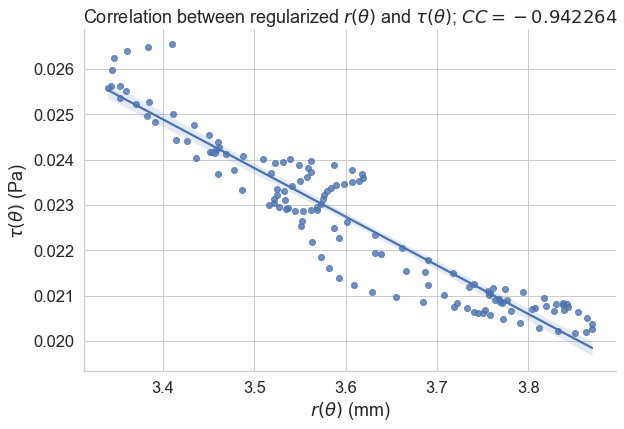

In [29]:
sns.set(font_scale = 1.5)  # 0 year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=-0.942264$')
plt.savefig('hflrvstauT0', bbox_inches='tight',dpi=300)

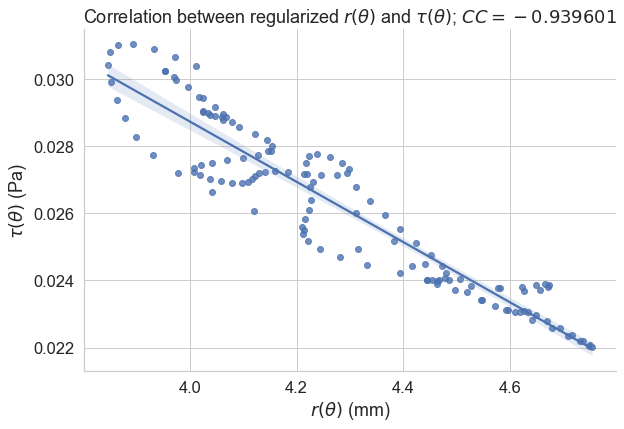

In [30]:
sns.set(font_scale = 1.5)  # 1 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_50, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=-0.939601$')
plt.savefig('hflrvstauT1', bbox_inches='tight',dpi=300)

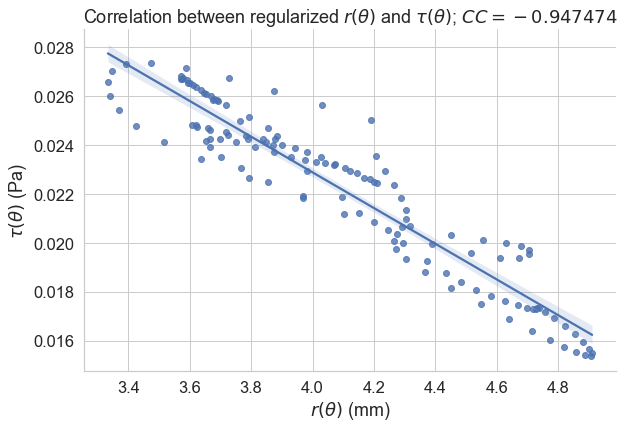

In [31]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='r($\theta$)', y = '$\tau$($\theta)$', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='$\\tau(\\theta)$ (Pa)',title='Correlation between regularized $r(\\theta)$ and $\\tau(\\theta)$; $CC=-0.947474$')
plt.savefig('hflrvstauT2', bbox_inches='tight',dpi=300)

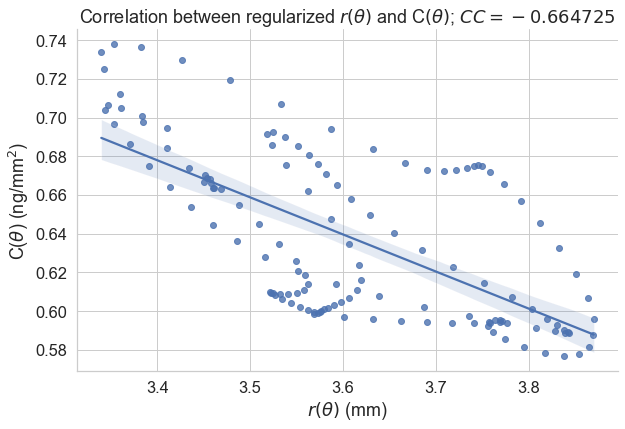

In [32]:
sns.set(font_scale = 1.5)  # 0 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
#lm0.set(ylim=(0.1,0.74))
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and C$(\\theta)$; $CC=-0.664725$')
plt.savefig('hflrvscT0', bbox_inches='tight',dpi=300)

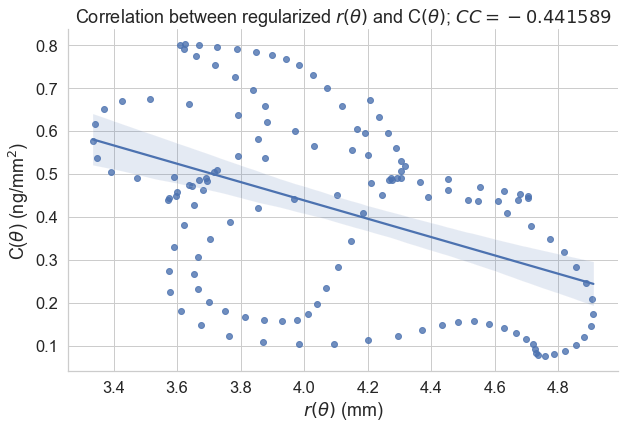

In [33]:
sns.set(font_scale = 1.5)  # 2 Years
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='r($\theta$)', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$r(\\theta)$ (mm)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $r(\\theta)$ and C$(\\theta)$; $CC=-0.441589$')
plt.savefig('hflrvscT2', bbox_inches='tight',dpi=300)

In [34]:
rvstau = np.array([])
rvsc = np.array([])
tauvsc = np.array([])
rvskappa = np.array([])
tauvskappa = np.array([])
cvskappa = np.array([])

df_reg_0.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.942264    -0.664725   
$\tau$($\theta)$      -0.942264          1.000000     0.568765   
C($\theta$)           -0.664725          0.568765     1.000000   
$\kappa$($\theta)$     0.509278         -0.419905    -0.489615   

                    $\kappa$($\theta)$  
r($\theta$)                   0.509278  
$\tau$($\theta)$             -0.419905  
C($\theta$)                  -0.489615  
$\kappa$($\theta)$            1.000000

In [35]:
rvstau = np.append(rvstau, -0.942264)
rvsc = np.append(rvsc, -0.664725)
tauvsc = np.append(tauvsc, 0.568765)
rvskappa = np.append(rvskappa, 0.509278)
tauvskappa = np.append(tauvskappa, -0.419905)
cvskappa = np.append(cvskappa, -0.489615)

In [36]:
df_reg_25.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.942653    -0.114862   
$\tau$($\theta)$      -0.942653          1.000000     0.189440   
C($\theta$)           -0.114862          0.189440     1.000000   
$\kappa$($\theta)$     0.514797         -0.420314     0.116340   

                    $\kappa$($\theta)$  
r($\theta$)                   0.514797  
$\tau$($\theta)$             -0.420314  
C($\theta$)                   0.116340  
$\kappa$($\theta)$            1.000000

In [37]:
rvstau = np.append(rvstau, -0.942653)
rvsc = np.append(rvsc, -0.114862)
tauvsc = np.append(tauvsc, 0.189440)
rvskappa = np.append(rvskappa, 0.514797)
tauvskappa = np.append(tauvskappa, -0.420314)
cvskappa = np.append(cvskappa, 0.116340)

In [38]:
df_reg_50.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.939601    -0.375455   
$\tau$($\theta)$      -0.939601          1.000000     0.271172   
C($\theta$)           -0.375455          0.271172     1.000000   
$\kappa$($\theta)$     0.488956         -0.342142    -0.027088   

                    $\kappa$($\theta)$  
r($\theta$)                   0.488956  
$\tau$($\theta)$             -0.342142  
C($\theta$)                  -0.027088  
$\kappa$($\theta)$            1.000000

In [39]:
rvstau = np.append(rvstau, -0.939601)
rvsc = np.append(rvsc, -0.375455)
tauvsc = np.append(tauvsc, 0.271172)
rvskappa = np.append(rvskappa, 0.488956)
tauvskappa = np.append(tauvskappa, -0.342142)
cvskappa = np.append(cvskappa, -0.027088)

In [40]:
df_reg_75.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.946754    -0.356173   
$\tau$($\theta)$      -0.946754          1.000000     0.383099   
C($\theta$)           -0.356173          0.383099     1.000000   
$\kappa$($\theta)$     0.519531         -0.365104    -0.041777   

                    $\kappa$($\theta)$  
r($\theta$)                   0.519531  
$\tau$($\theta)$             -0.365104  
C($\theta$)                  -0.041777  
$\kappa$($\theta)$            1.000000

In [41]:
rvstau = np.append(rvstau, -0.946754)
rvsc = np.append(rvsc, -0.356173)
tauvsc = np.append(tauvsc, 0.383099)
rvskappa = np.append(rvskappa, 0.519531)
tauvskappa = np.append(tauvskappa, -0.365104)
cvskappa = np.append(cvskappa, -0.041777)

In [42]:
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.947474    -0.441589   
$\tau$($\theta)$      -0.947474          1.000000     0.458606   
C($\theta$)           -0.441589          0.458606     1.000000   
$\kappa$($\theta)$     0.493229         -0.325584    -0.094818   

                    $\kappa$($\theta)$  
r($\theta$)                   0.493229  
$\tau$($\theta)$             -0.325584  
C($\theta$)                  -0.094818  
$\kappa$($\theta)$            1.000000

In [43]:
rvstau = np.append(rvstau, -0.947474)
rvsc = np.append(rvsc, -0.441589)
tauvsc = np.append(tauvsc, 0.458606)
rvskappa = np.append(rvskappa, 0.493229)
tauvskappa = np.append(tauvskappa, -0.325584)
cvskappa = np.append(cvskappa, -0.094818)

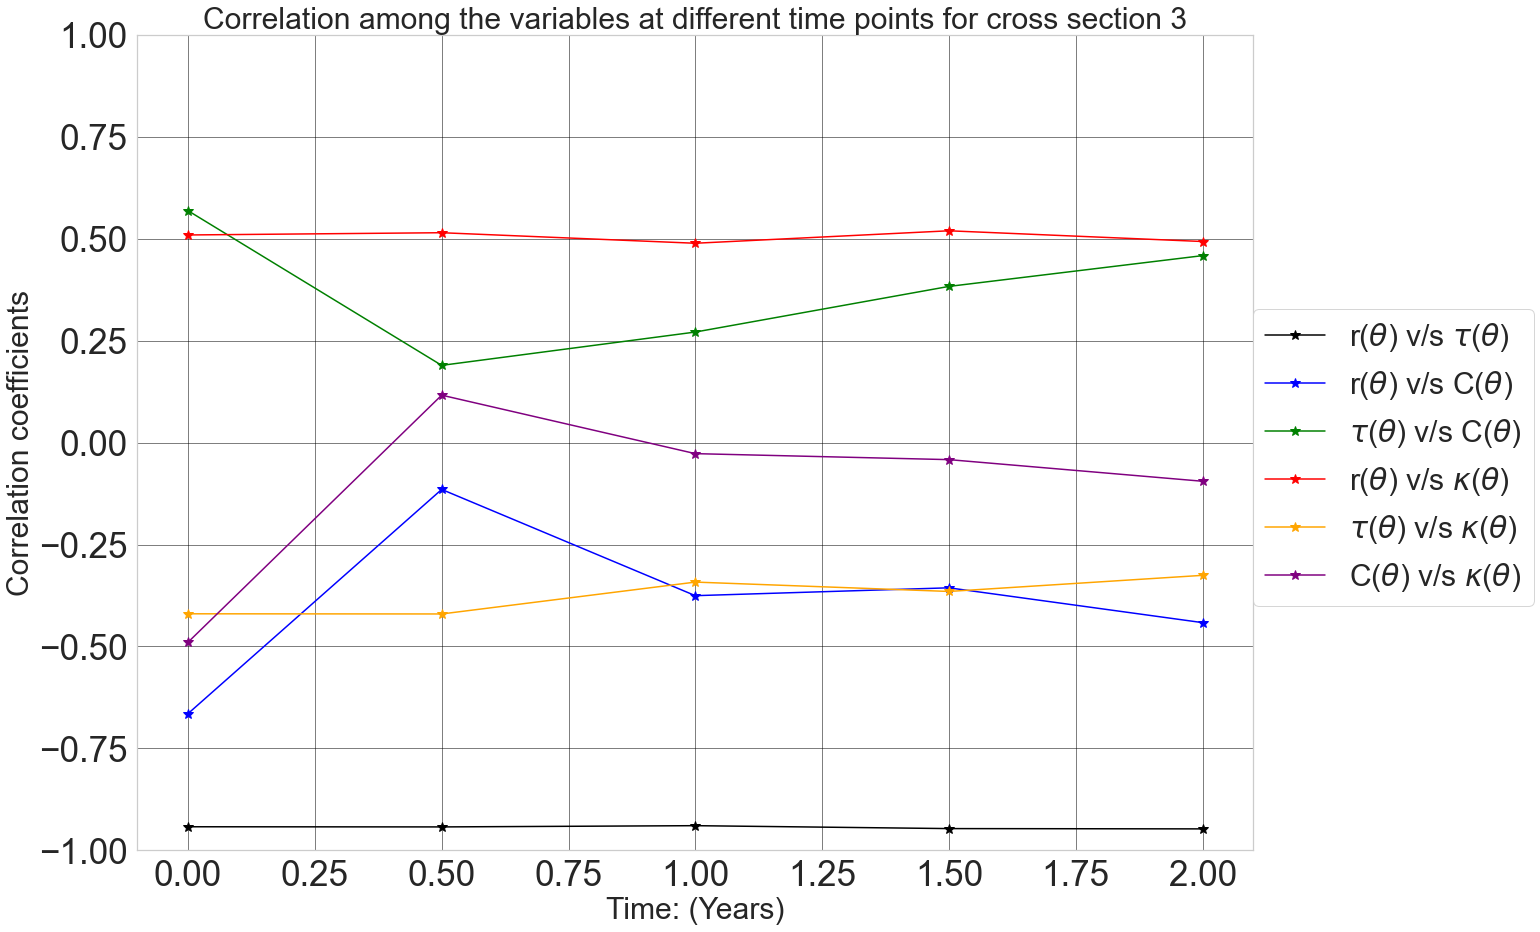

In [44]:
T = np.array([0, 0.5, 1.0, 1.5, 2.0])
plt.figure(figsize=(20,15)) 
plt.plot(T,rvstau, color='black', marker = '*', markersize=10, label='r($\\theta$) v/s $\\tau$($\\theta$)')
plt.plot(T,rvsc, color='blue', marker = '*', markersize=10, label='r($\\theta$) v/s C($\\theta$)')
plt.plot(T,tauvsc, color='green', marker = '*', markersize=10, label='$\\tau$($\\theta$) v/s C($\\theta$)')
plt.plot(T,rvskappa, color='red', marker = '*', markersize=10, label='r($\\theta$) v/s $\\kappa$($\\theta$)')
plt.plot(T,tauvskappa, color='orange', marker = '*', markersize=10, label='$\\tau$($\\theta$) v/s $\\kappa$($\\theta$)')
plt.plot(T,cvskappa, color='purple', marker = '*', markersize=10, label='C($\\theta$) v/s $\\kappa$($\\theta$)')
plt.xlabel('Time: (Years)',fontsize=30)
plt.ylabel('Correlation coefficients',fontsize=30)
plt.title('Correlation among the variables at different time points for cross section 3',fontsize=30)
plt.ylim([-1.0,1.0])
plt.tick_params(which='both', labelsize=35)
plt.grid(color='black',linewidth = 0.5)
plt.legend(loc=(1.0,0.3),fontsize=30)
plt.savefig('hflcorrcoeffsfordifftimes', bbox_inches='tight',dpi=85)
plt.show()

In [48]:
df_reg_0.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.942264    -0.664725   
$\tau$($\theta)$      -0.942264          1.000000     0.568765   
C($\theta$)           -0.664725          0.568765     1.000000   
$\kappa$($\theta)$     0.509278         -0.419905    -0.489615   

                    $\kappa$($\theta)$  
r($\theta$)                   0.509278  
$\tau$($\theta)$             -0.419905  
C($\theta$)                  -0.489615  
$\kappa$($\theta)$            1.000000

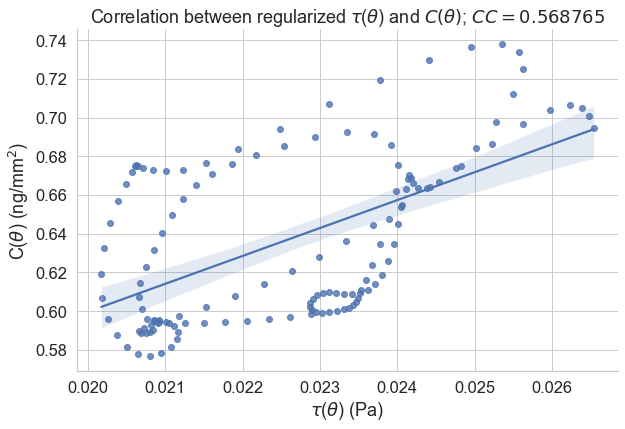

In [53]:
sns.set(font_scale = 1.5)  # 0 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_0, x='$\tau$($\theta)$', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$\\tau$($\\theta$) (Pa)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $\\tau$($\\theta$) and $C(\\theta)$; $CC=0.568765$')
plt.savefig('hfltauvscT0', bbox_inches='tight',dpi=300)

In [50]:
df_reg_99.corr()

r($\theta$)  $\tau$($\theta)$  C($\theta$)  \
r($\theta$)            1.000000         -0.947474    -0.441589   
$\tau$($\theta)$      -0.947474          1.000000     0.458606   
C($\theta$)           -0.441589          0.458606     1.000000   
$\kappa$($\theta)$     0.493229         -0.325584    -0.094818   

                    $\kappa$($\theta)$  
r($\theta$)                   0.493229  
$\tau$($\theta)$             -0.325584  
C($\theta$)                  -0.094818  
$\kappa$($\theta)$            1.000000

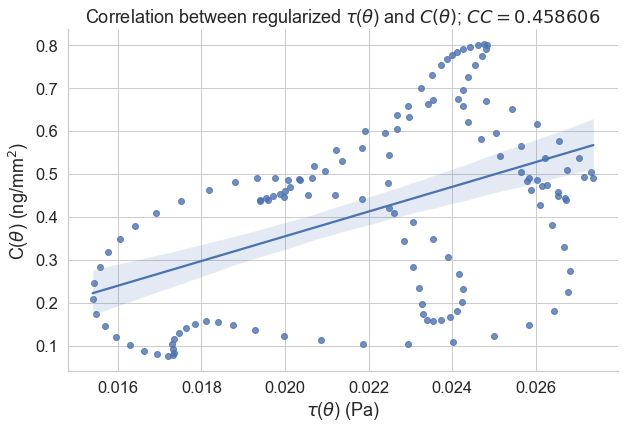

In [52]:
sns.set(font_scale = 1.5)  # 0 Year
sns.set_style('whitegrid')
lm0=sns.lmplot(data = df_reg_99, x='$\tau$($\theta)$', y = 'C($\theta$)', height=6, aspect=1.5)
lm0.set(xlabel='$\\tau$($\\theta$) (Pa)', ylabel='C($\\theta$) (ng/mm$^{2}$)',title='Correlation between regularized $\\tau$($\\theta$) and $C(\\theta)$; $CC=0.458606$')
plt.savefig('hfltauvscT2', bbox_inches='tight',dpi=300)